In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('lib')
from lib.read_data import *
import time

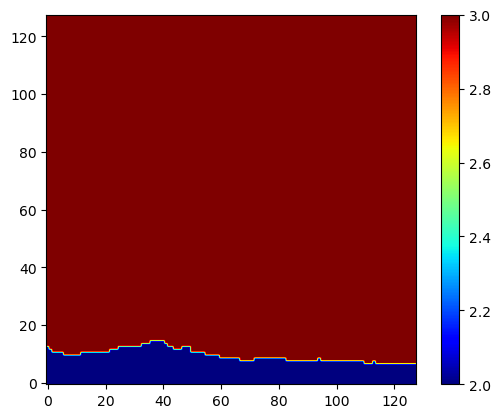

In [20]:
N = 128
frame = 100
flags = read_flags(f"data/dambreak_N{N}_200/flags_{frame}.bin")

sol = load_vector(f"data/dambreak_N{N}_200/pressure_{frame}.bin")
rhs = load_vector(f"data/dambreak_N{N}_200/div_v_star_{frame}.bin")


plt.imshow(flags.reshape(N, N).T, cmap='jet', origin='lower')
plt.colorbar()
plt.show()

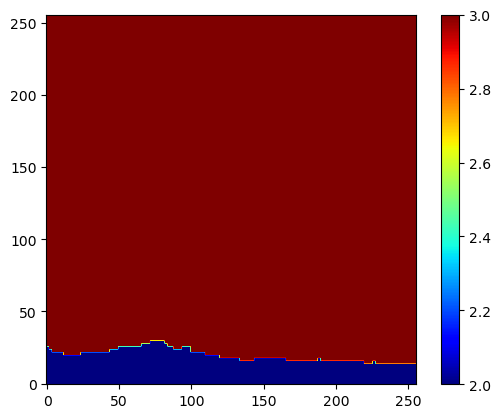

In [22]:
scale = 2
flags_up = flags.reshape(N,N).repeat(scale, axis=0).repeat(scale, axis=1)

plt.imshow(flags_up.reshape(N*scale, N*scale).T, cmap='jet', origin='lower')
plt.colorbar()
plt.show()

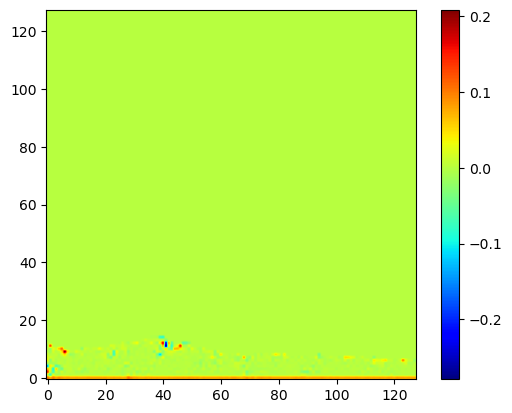

In [23]:
plt.imshow(rhs.reshape(N, N).T, cmap='jet', origin='lower')
plt.colorbar()
plt.show()

In [46]:
fluids = np.argwhere(flags_up.ravel() == 2).ravel()

In [47]:
fluids.shape

(5048,)

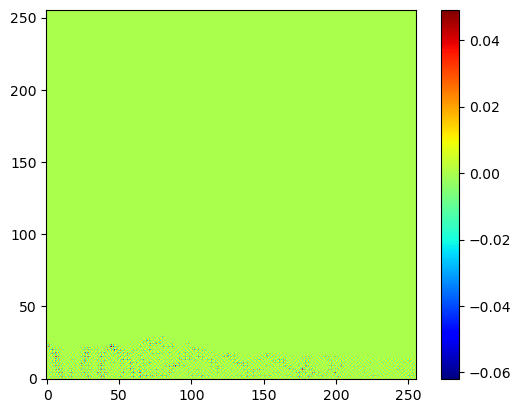

In [60]:
scale = 2
rhs_up = rhs.reshape(N,N).repeat(scale, axis=0).repeat(scale, axis=1)
ritz_vec = np.memmap(f"data/dambreak_N256_200/preprocessed/100_N128/ritz_400.dat", dtype=np.float32, mode='r+', shape=(400, len(fluids)))
v= np.zeros(N*scale*N*scale)
v[fluids] = ritz_vec[300]
plt.imshow(v.reshape(N*scale, N*scale).T, cmap='jet', origin='lower')
plt.colorbar()
plt.show()

In [6]:
np.save(f"data/dambreak_N256_200/flags_N128_{frame}.npy", flags_up.ravel())

In [7]:
A = sparse.load_npz(f"data/dambreak_N256_200/A_N128_{frame}.npz")

In [29]:
sol_up = sol.reshape(N,N).repeat(scale, axis=0).repeat(scale, axis=1)
r = rhs_up.ravel() - A @ sol_up.ravel()
np.linalg.norm(r)


5.444051470259814

In [4]:
from lib.discrete_laplacian import lap_with_bc, box_bd

air = np.argwhere(flags_up.ravel() == 3).ravel()
A = lap_with_bc(N*scale+2, 2, air=air, bd=box_bd(N*scale+2, 2), bd_padding=False)
A

<65536x65536 sparse matrix of type '<class 'numpy.float32'>'
	with 24640 stored elements in Compressed Sparse Row format>

In [1]:
sparse.save_npz(f"data/dambreak_N256_200/A_N128_{frame}.npz", A)

NameError: name 'sparse' is not defined

24640